In [15]:
from npc_sessions import DynamicRoutingSession, get_sessions
import npc_sessions.utils.stim as stim
import npc_sessions.utils as utils
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [10]:
# session = DynamicRoutingSession('670248_2023-08-01') #templeton session, 
session = DynamicRoutingSession('668755_2023-08-30')

In [11]:
task_stim = next(s for s in session.stim_paths if 'DynamicRouting' in s.stem)
task_stim

S3Path('s3://aind-ephys-data/ecephys_668755_2023-08-30_12-36-35/behavior/DynamicRouting1_668755_20230830_130853.hdf5')

In [19]:
lat_nidaq_env = stim.get_stim_latencies_from_nidaq_recording(
    task_stim,
    session.sync_path,
    session.ephys_recording_dirs,
    'audio',
    use_envelope=True,
)

lat_nidaq_sig = stim.get_stim_latencies_from_nidaq_recording(
    task_stim,
    session.sync_path,
    session.ephys_recording_dirs,
    'audio',
    use_envelope=False,
)

c:\Users\ethan.mcbride\Code\npc_sessions\.venv\Lib\site-packages\numcodecs\abc.py:107: UserWarning: Multi-threading is supported for wavpack version>=5.6.4, but current version is 5.5.0. Parallel decoding will not be available.
  return cls(**config)


In [ ]:
lat_nidaq_sig_list = [y.latency for y in lat_nidaq_sig if y is not None]
lat_nidaq_env_list = [y.latency for y in lat_nidaq_env if y is not None]

audtridx=[]
for ii,lat in enumerate(lat_nidaq_sig):
    if lat is not None:
        audtridx.append(ii)

In [18]:
# TODO: deal with sessions without sync sound on
if session.sync_data.start_time.date() >= datetime.date(year=2023,month=8,day=31):
    sync_sound_on=True
else:
    sync_sound_on=False

if sync_sound_on:
    sync_line = stim.get_sync_line_for_stim_onset(
        "audio", session.sync_data.start_time.date()
    )

    lat_sync =  stim.get_stim_latencies_from_sync(
        task_stim,
        session.sync_path,
        "audio",
        sync_line
    )

    lat_sync_list = [y.latency for y in lat_sync if y is not None]

    audtridx_sync=[]
    for ii,lat in enumerate(lat_sync):
        if lat is not None:
            audtridx_sync.append(ii)

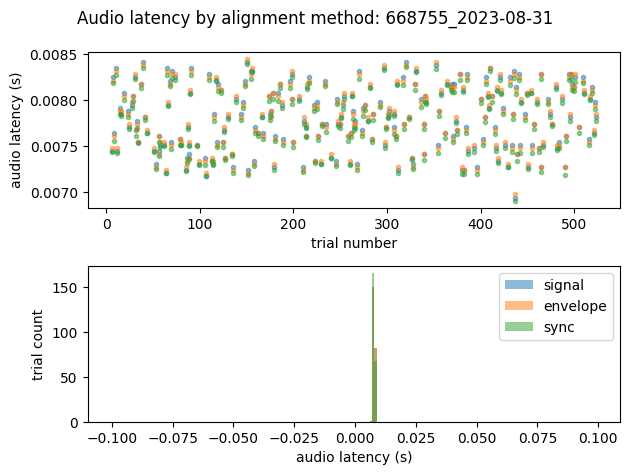

In [9]:
xbins=np.arange(-0.1,0.1,0.001)
fig,ax=plt.subplots(2,1)
ax[0].plot(audtridx,lat_nidaq_sig_list,'.',alpha=0.5)
ax[0].plot(audtridx,lat_nidaq_env_list,'.',alpha=0.5)

ax[0].set_xlabel('trial number')
ax[0].set_ylabel('audio latency (s)')

ax[1].hist(lat_nidaq_sig_list,bins=xbins,alpha=0.5)
ax[1].hist(lat_nidaq_env_list,bins=xbins,alpha=0.5)

ax[1].set_xlabel('audio latency (s)')
ax[1].set_ylabel('trial count')
ax[1].legend(['signal','envelope'])

if sync_sound_on==True:
    ax[0].plot(audtridx_sync,lat_sync_list,'.',alpha=0.5)
    ax[1].hist(lat_sync_list,bins=xbins,alpha=0.5)
    ax[1].legend(['signal','envelope','sync'])

if 'templeton' in session.task_version:
    figtitle='Audio latency by alignment method: '+session.id+' (templeton)'
else:
    figtitle='Audio latency by alignment method: '+session.id+' (DR)'

fig.suptitle(figtitle)
fig.tight_layout()